# Lesson 1: Digital Images

Our goal today is to understand what a digital image is and how it is commonly represented as bits and bytes. We will cover the following topics:

- 1. Loading and viewing images
   - 1-1 Load image into iPython notebook   
   - 1-2 Load the associated metadata   
   - 1-3 Get bit depth of image    
   - 1-4 View image in iPython notebook      
- 2. Indexing and arrays
    - 2-1 Print a subset of pixel values (such as the top right corner)   
    - 2-2 Set that subset of values to 0   
    - 2-3 View the modified image in iPython       
- 3. Histogram the pixel values in the image
- 4. Color maps and color science
- 5. File size, disk space, and memory: 
    - 5-1 Report the size of the file on the disk    
    - 5-2 Report the size of the file read into memory       
- 6. Errors and debugs:   
    - 6-1 SyntaxError
    - 6-2 NameError
    - 6-3 IndexError   

**Exercise 1** let's practice using jupyter notebooks

In the line below (that reads "My notes about jupyter notebooks"), change the cell type to a markdown (non-executable comments). It should look like this line of text when you're done. 

How to: 
Click just to the left of the cell. The marker on the right should turn blue (and not be green). If green, hit escape. 

Hint: You can find the shortcut for this by clicking outside of the text boxes and pressing "h". This information will be in the "Command Mode" section of the help menu.

**My notes about jupyter notebooks**

From Edit mode (green-selected cell that you can type into)
   - SHIFT-ENTER runs the cell and selects the cell below
   - ESC puts you into command mode
   - h pulls up a help window

From Command mode (blue-marked cell)
   - a enters a new cell above the selected cell
   - b enters a new cell below the selected cell
   - dd deletes the selected cell
   - y changes the cell type to python code
   - ENTER enters edit mode
   - m WHAT DOES M DO????? (students, maybe you want to write this in :)

## 1.Loading and viewing images

First some boilerplate code to make it easier to access useful libraries, and to make it easier to visualize data in the notebook.

In [2]:
%matplotlib inline                

import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns

"%matplotlib inline" is a magic function to sets the backend of matplotlib to the 'inline' backend, which means plotting right after commond, and saving the results.

Now the `numpy` numerical array library is available as `np`. Plotting functions are available with `plt`, and `seaborn`'s advanced plots are accessed through `sns`. Just importing `seaborn` at all makes `Matplotlib` look nicer.

Let's set some defaults for the packages we just imported, which gets rid of grid line on our image plots!

In [3]:
sns.set_style("dark")

Use bash commands to list the files in the folder  dev-summer2018-master/Data_ConfocalDrugPanel by prepending the commands with "!"

In [4]:
pwd

'/Users/Tomato/Desktop/temp/Image2018Winter/lessons'

In [5]:
cd /Users/Tomato/Desktop/temp/dev-summer2018-master

/Users/Tomato/Desktop/temp/dev-summer2018-master


In [6]:
ls ./Data_ConfocalDrugPanel/

DMSO.tif*            drugA.tif*           temp_DMSO.tif*
DMSO_metadata.json*  drugA_metadata.json*


Let's stay in the class folder " dev-summer2018-master" * may be a different name

In [7]:
pwd

'/Users/Tomato/Desktop/temp/dev-summer2018-master'

Let's make a common data path for our class.

In [8]:
data_path = "./Data_ConfocalDrugPanel/"

### 1-1 Load image into Jupyter notebook

In [9]:
from skimage.io import imread

In [10]:
imread?

In [11]:
wt_data = imread(data_path+ "DMSO.tif")

In [12]:
wt_data.shape

(9, 819, 819, 3)

These are the image dimensions. Since `data` is `numpy` array, as we will appreciate soon, its shape is described like you might describe a mathematical matrix: row-by-column. Rows are arranged vertically, and columns horizontally, so that a row-by-column description is height-by-width in image speak. Keep this in mind - for some it's more natural to refer to width-by-height, but that's not how things work here!

Load the metadata:
Here I have saved the metadata in a file format called json. Json files are easily loaded into python as the dictionary data type. Dictionaries in python are indexed with keys, which are strings instead of numerical indices (such as used in lists). To understand this concept, load the below json file and examine it.

In [13]:
import json
with open(data_path + "DMSO_metadata.json", mode='r') as metadata_wt:
    meta_wt = json.load(metadata_wt)

Visualize the information stored in this dict

In [14]:
for key in meta_wt:
    print(key)

raw_data_date
pixel_size
cell_type
axes
image_preprocessing_done
channels


In [15]:
meta_wt["channels"]

['your_fav_protein', 'nucleus', 'actin']

**Exercise 2** let's practice to check the other information stored in this meta data.

In [16]:
meta_wt["axes"]

['ZXYTC']

It can be useful to organize your data into a dict instead of a numerical array when one of the dimensions of the array corresponds to something that is non-numerical in nature. Here, the channel dimension is stored as another dimension in the numerical array that is wt_data. To get the image corresponding to one of the channels, you would have to remember which of the channel slices corresponds to the channel you would like to see. Below we'll organize the data into a dict so that the channels can be indexed by an intuitive string and not a numerical index.

In [17]:
wt = {}

for idx, channel in enumerate(meta_wt['channels']):
    wt[channel] = wt_data[3,:,:,idx]
    print(idx)

0
1
2



### 1-3 Get bit depth of image

In [18]:
wt_data.dtype

dtype('uint16')

They are mayn kinds of data types. Here the data type is `uint16`.
 `uint16` means "unsigned (not negative) integer with 16 bits per pixel".

16 bits means there are $2^{16} = 65536$ possible pixel values. Many scientific images will use 8 or even 12 bits which will have less contrast.

### 1-4 View image in iPython notebook

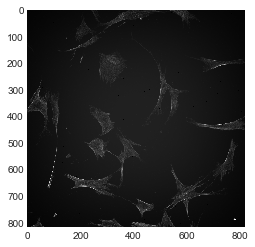

In [19]:
plt.imshow(wt["actin"], cmap='gray')

We had to specify how we wanted our colorless image to be rendered on our colorful screen, which is why we included `cmap=gray` (cmap for colormap).

We will talk more about colormaps and channels later.

## 2. Indexing and arrays

### 2-1 Print a subset of pixel values 

How would we index into the upper left-most pixel?

In [20]:
wt["actin"][0,0]

1039

What about the lower left?

In [21]:
wt["actin"][-1,0] # row -1 aka last, column 0

950

What about a 10x10 slice from the upper right?

In [22]:
wt["actin"][0:10,-10:-1] # row from 0 to 10 (not inclusive for 10! and column 10th-to-last second)

array([[1123, 1199, 1067, 1069, 1096, 1108, 1069, 1052,  949],
       [1187, 1154, 1109, 1052, 1032, 1059, 1085, 1101, 1039],
       [1117, 1114, 1180, 1150, 1117, 1129, 1134, 1027,  978],
       [1072, 1122, 1321, 1194, 1039, 1103, 1148, 1065, 1050],
       [1106, 1154, 1144, 1087, 1107, 1121, 1131, 1011, 1065],
       [1210, 1101, 1004, 1046, 1061, 1103, 1033, 1121, 1120],
       [1204, 1153, 1085, 1143, 1096, 1108, 1215, 1164, 1131],
       [1178, 1159, 1220, 1108, 1107, 1147, 1104, 1102, 1117],
       [1096, 1176, 1137,  972, 1174, 1086, 1182, 1093, 1065],
       [1117, 1139, 1183, 1134, 1023, 1120, 1097, 1141,    0]],
      dtype=uint16)

Does this look like the upper right?

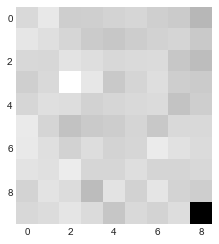

In [23]:
plt.imshow(wt["actin"][0:10,-10:-1], cmap='gray')

We only have 90 pixles not 100 pixles.

Note that ranges of indices are exclusive on the high side, inclusive on the low. What happens if I have a slice `1:2`?

In [24]:
wt["actin"][1:2, 1:2]

array([[977]], dtype=uint16)

We get row and column "from 1, up to (but not including) 2". This is the same as `data[1,1]`.

How can we get to the last column?

In [25]:
wt["actin"][0:10, 809:819]

array([[1123, 1199, 1067, 1069, 1096, 1108, 1069, 1052,  949, 1097],
       [1187, 1154, 1109, 1052, 1032, 1059, 1085, 1101, 1039, 1018],
       [1117, 1114, 1180, 1150, 1117, 1129, 1134, 1027,  978, 1095],
       [1072, 1122, 1321, 1194, 1039, 1103, 1148, 1065, 1050, 1024],
       [1106, 1154, 1144, 1087, 1107, 1121, 1131, 1011, 1065, 1074],
       [1210, 1101, 1004, 1046, 1061, 1103, 1033, 1121, 1120, 1100],
       [1204, 1153, 1085, 1143, 1096, 1108, 1215, 1164, 1131, 1120],
       [1178, 1159, 1220, 1108, 1107, 1147, 1104, 1102, 1117, 1084],
       [1096, 1176, 1137,  972, 1174, 1086, 1182, 1093, 1065, 1018],
       [1117, 1139, 1183, 1134, 1023, 1120, 1097, 1141,    0, 1060]],
      dtype=uint16)

To save some typing when slicing into your data, we can leave off the value before the colon, meaning (to the beginning). Leaving off the value after means (to the end).

In [26]:
wt["actin"][:10,-10:]

array([[1123, 1199, 1067, 1069, 1096, 1108, 1069, 1052,  949, 1097],
       [1187, 1154, 1109, 1052, 1032, 1059, 1085, 1101, 1039, 1018],
       [1117, 1114, 1180, 1150, 1117, 1129, 1134, 1027,  978, 1095],
       [1072, 1122, 1321, 1194, 1039, 1103, 1148, 1065, 1050, 1024],
       [1106, 1154, 1144, 1087, 1107, 1121, 1131, 1011, 1065, 1074],
       [1210, 1101, 1004, 1046, 1061, 1103, 1033, 1121, 1120, 1100],
       [1204, 1153, 1085, 1143, 1096, 1108, 1215, 1164, 1131, 1120],
       [1178, 1159, 1220, 1108, 1107, 1147, 1104, 1102, 1117, 1084],
       [1096, 1176, 1137,  972, 1174, 1086, 1182, 1093, 1065, 1018],
       [1117, 1139, 1183, 1134, 1023, 1120, 1097, 1141,    0, 1060]],
      dtype=uint16)

### 2-2 Set that subset of values to 0 

Let's not ruin our original by making a copy!

In [27]:
modified_data = wt["actin"].copy()

We've viewed data using slicing, now let's set data using slicing!

In [28]:
modified_data[:500,-500:] = 0

Even though `modified_data[:500,:500]` is a 500x500 array, and 0 is just a scalar, `numpy` is smart and will _broadcast_ the 1x1 value `0` so that the whole 500x500 array is set to a 500x500 array of zeros.

### 2-3 View the modified image

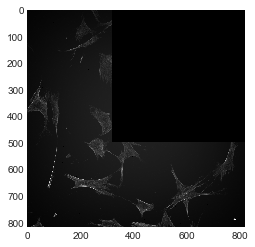

In [29]:
plt.imshow(modified_data, cmap='gray')

## 3. Histogram the pixel values in the image 

Pixels in an image are just represented by numbers. We can get a sense for the distribution of brightness in our image by looking at a histogram of intensities. Here we don't think about an image as representing something spacial - just a collection of numbers.

Make our array into a simple 1D list of data

In [30]:
flat_data = wt["nucleus"].flatten()

/Users/Tomato/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 20000)

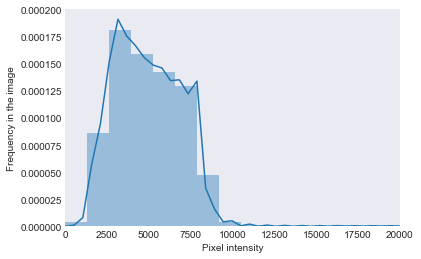

In [31]:
sns.distplot(flat_data) #distplot=distribution plot
plt.xlabel("Pixel intensity")
plt.ylabel("Frequency in the image")
plt.xlim(0,20000)

## 4.Color maps and color science

If we wanted to visualize things in a more striking way, with false colors and more contrast, we could use a different colormap.

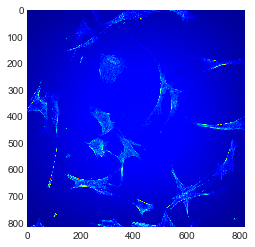

In [32]:
plt.imshow(wt["actin"], cmap='jet')

Jet is a bad colormap because it is perceptually non-uniform.

Access IPython's browser-based image display.

In [33]:
from IPython.display import Image

Quickly display a diagram we saved in a file

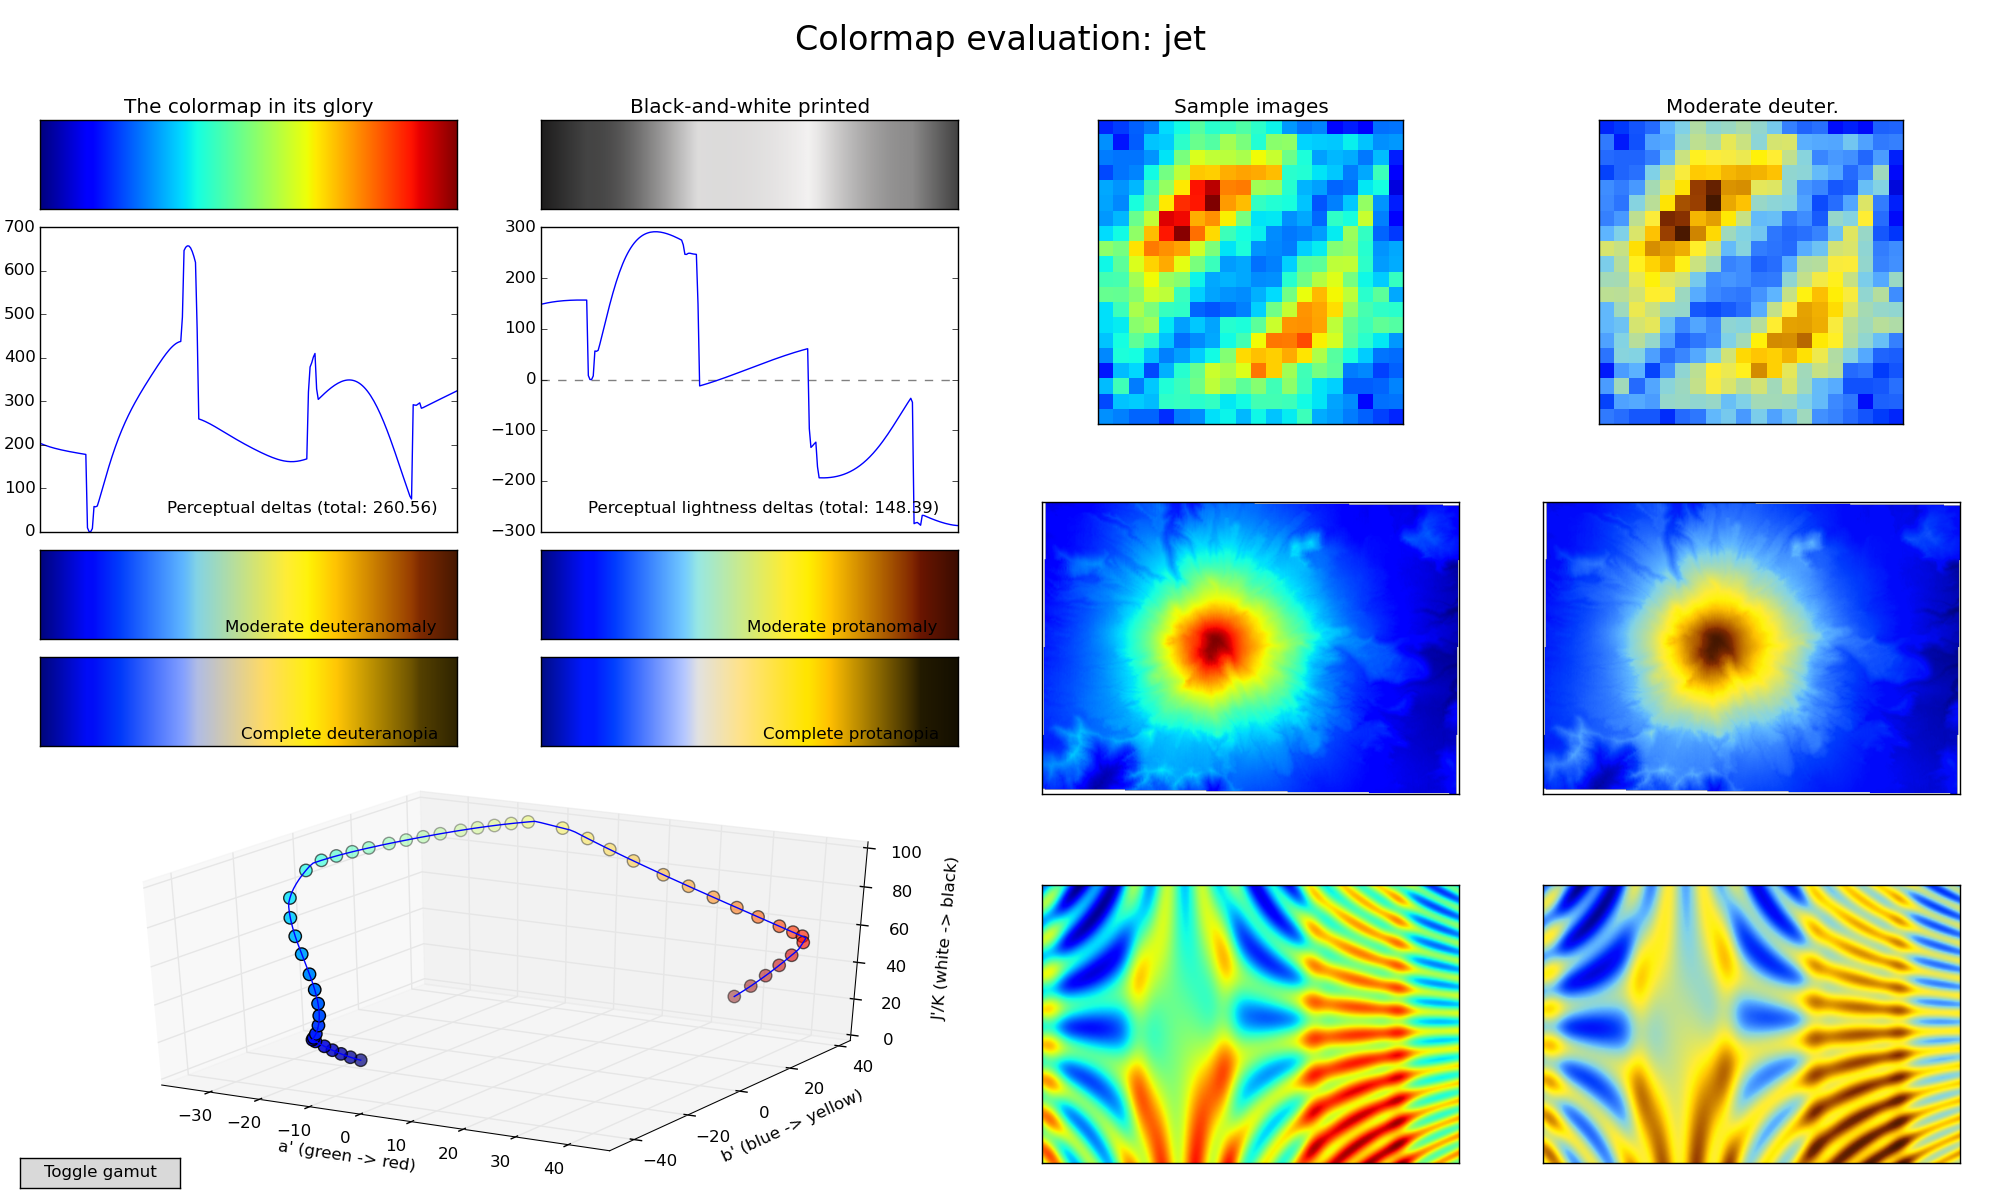

In [34]:
Image("./Figures/jet.png")

The jumps in the "perceptual deltas" plot are values where this colormap makes it look like sharp transitions occur when they do not. Colorblind users rely more on lightness than hue, and will be especially misled.

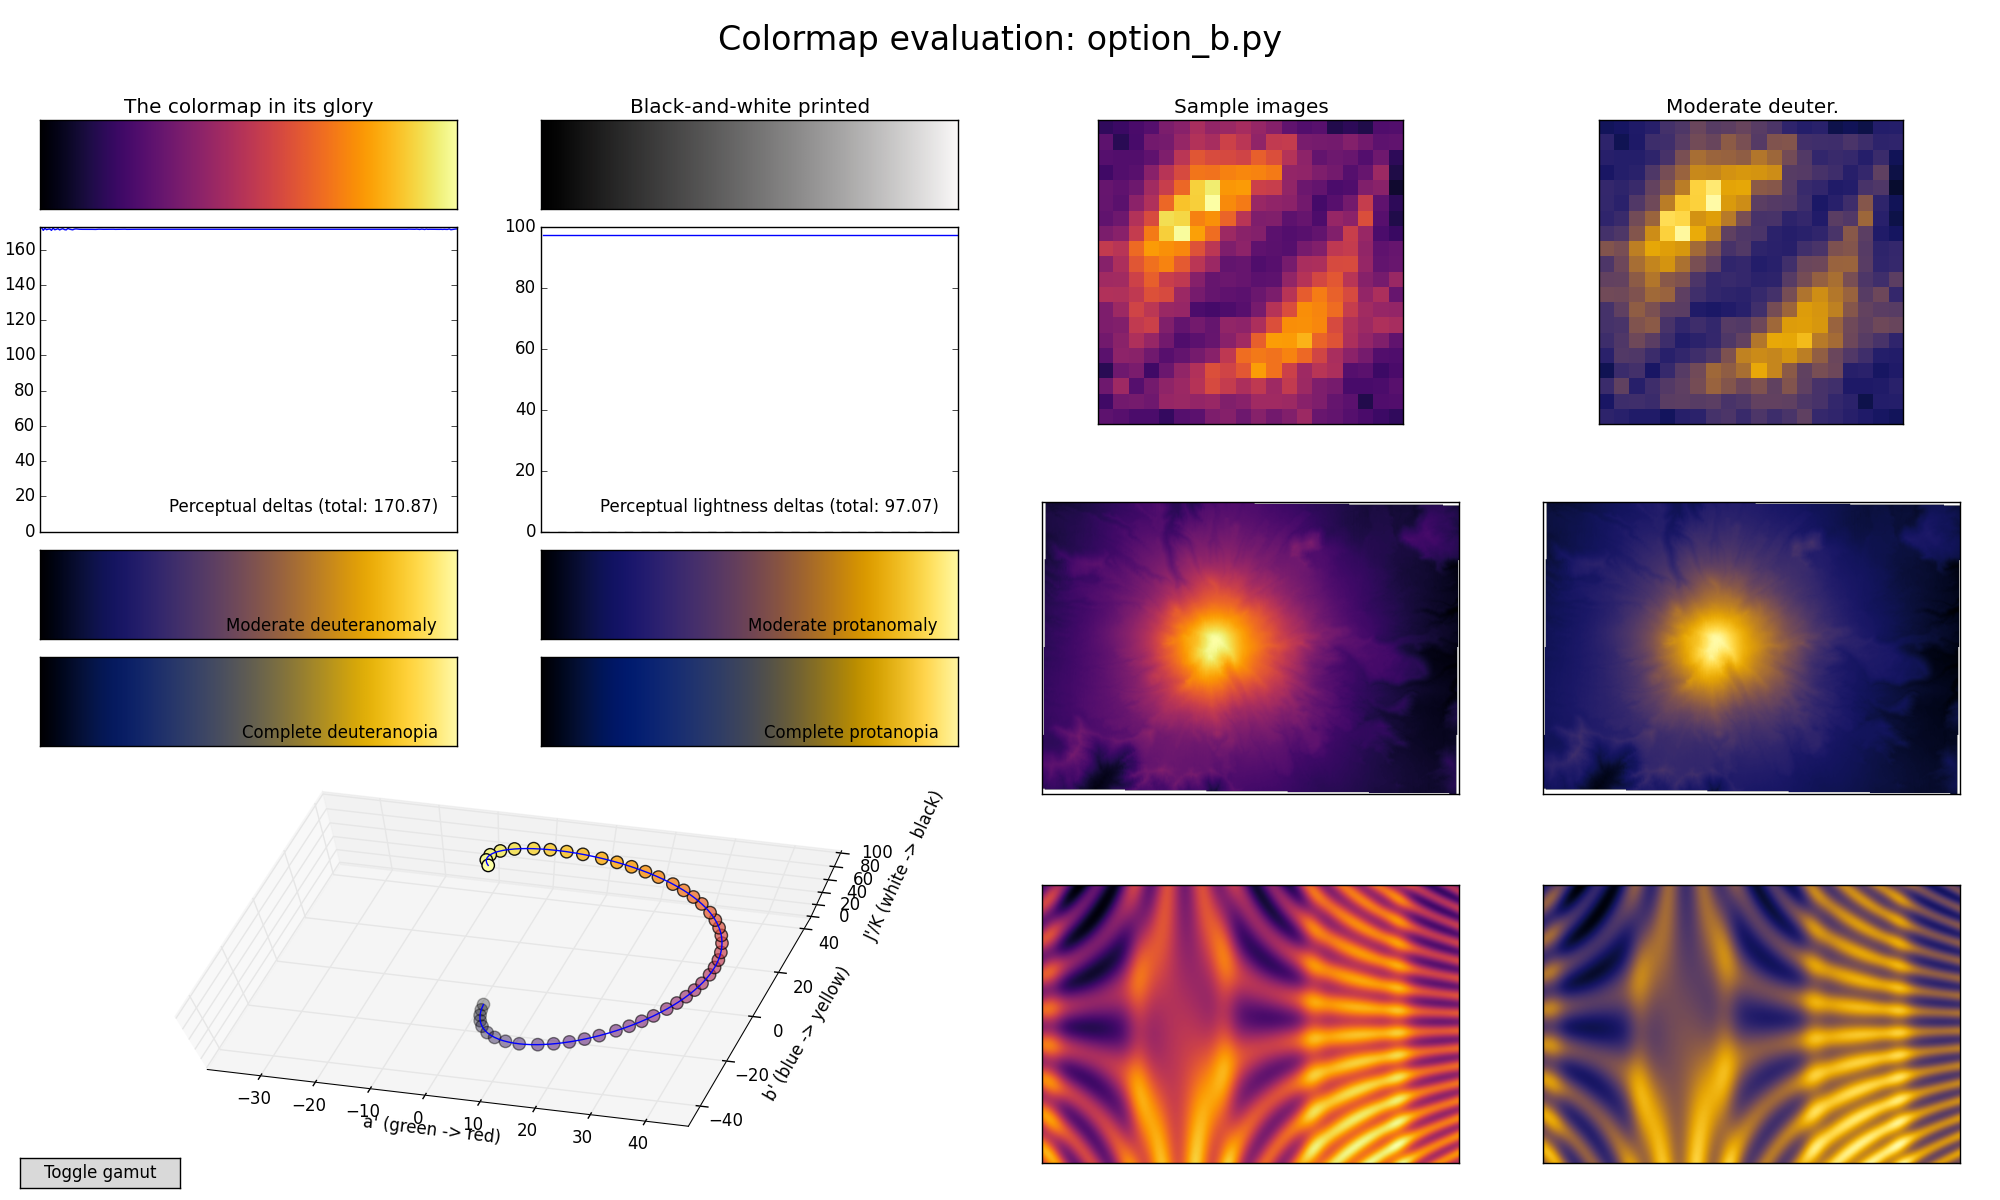

In [35]:
Image("./Figures/option_b.png")

This colormap is perceptually uniform by design! It looks cool too.

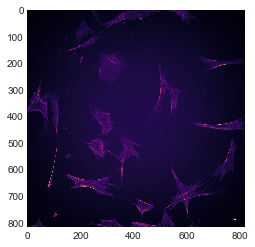

In [36]:
plt.imshow(wt["actin"], cmap='inferno')

**Exercise 3** We discussed that "jet" or really any of the rainbow colormaps are perceptually deceiving. Find the documentation for the matplotlib colormaps online. View your "data" slice with your perceptually-uniform colormap of choice. 

Here is the link:
https://matplotlib.org/users/colormaps.html

View image using plasma colormap

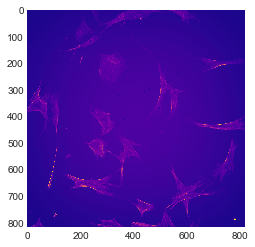

In [37]:
plt.imshow(wt["actin"], cmap = 'plasma')

Run the following cell to look up the imshow documentation on how to adjust the contrast by specifying vmin and vmax. 

In [38]:
plt.imshow?

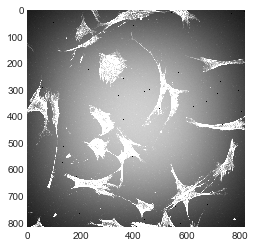

In [39]:
plt.imshow(wt["actin"], cmap = 'gray', vmin = 0, vmax = 10000)

## 5. File size, disk space, and memory 

### 5-1 Report the size of the file on the disk 

a human-readable description of the image file we've been using
Pro tip: a leading `!` in a notebook drops you into bash.

In [40]:
!ls -lh "./Data_ConfocalDrugPanel/DMSO.tif"

-rwxr-xr-x@ 1 Tomato  staff    35M Nov  1 16:32 ./Data_ConfocalDrugPanel/DMSO.tif


Note the "35M". That's our file size.

### 5-2 Report the size of the file read into memory 

In [41]:
wt_data.nbytes

36221094

What is this in MB?

In [42]:
wt_data.nbytes / 1024.**2 
# 1K = 1024 bytes, 1M = 1024K

34.54312705993652

So our image on-disk and loaded into Python are the same size. Therefore, this was an _uncompressed_ or _raw_ tif. Such files are quick to read and write, but take up lots of space on your hard drive. Image files always take up $bitdepth \times x \times y \times z$ in memory.

## 6. Errors and debugs 

In [43]:
def load_image(filename):
    return np.random.rand(400, 600)

### 6-1 Syntax errors

What is this code supposed to do?

In [44]:
for i in range(50)
    image_data = load_image("image_{}".format(i))
    my_images.append(image_data)

SyntaxError: invalid syntax (<ipython-input-44-a32fae2f2cb7>, line 1)

This file is trying to load a series of numbered images into an array of images.

_However_ running it gives you an error

Python errors are given to you as a "stack trace". Let's first dissect a stack trace.

**`File "<ipython-input-some_number-some_ID_number>", line 3`** tells you what file, and where in the file, the error came from. Because we're in a notebook, instead of a file we get a message that tells us we're in a notebook using IPython and that the error was in line 3.

**`  for i in range(50)`** is where Python conveniently reminds us what code was at line 3. Sometimes it shows us a bit of code before and after to give us context.

**`^`** marks exactly _where_ in line 3 the problem was noticed. This can be tricky because a problem with a function call may not be noticed until the closing ')' at the very end of the function. Nonetheless, here it might be helpful.

**`SyntaxError: invalid syntax`**. This tells us that our problem is a SyntaxError, which is one of a large hierarchy of errors python can provide us with.

`SyntaxError`s happen when Python sees you violating the rules of the language - it's a problem with the literal code characters you have typed rather than what your code is trying to do conceptually. Therefore they are usually short errors with quick fixes.

Do you see how to fix _this_ error?

In [45]:
for i in range(50):
    image_data = load_image("image_{}".format(i))
    my_images.append(image_data)

NameError: name 'my_images' is not defined

### 6.2 NameError 

`NameError`s happen when you try to access a python variable or function that does not exist yet. To get a NameError, Python has to actually try to run your code, so NameError is a type of `RuntimeError`.

Can you add in a line that fixes this code?

In [46]:
my_images = []

for i in range(50):
    image_data = load_image("image_{}".format(i))
    my_images.append(image_data)

In this case "my_images" does not exist, so it cannot be appended to, thus the name error. Making an empty my_images array solves this problem.

Now that our images are loaded, let's check to make sure each images's mean intensity changes by less than 10% compared with the next timage. This might be a good check to make sure no one bumped our microscope or turned on a light while we were taking images.

In [47]:
for i in range(50):
    intensity = my_images[i].mean()
    next_intensity = my_images[i+1].mean()
    if abs(intensity - next_intensity) > 0.10 * intensity:
        print("Notice: intensity jumped between images {} and {}".format(i, i+1))
        break

IndexError: list index out of range

### 6.3 IndexError

`IndexError`s happen when you try to access data from a list-like object, such as a `numpy` array or image, but the location you requested does not exist. Like asking for index 10 for a list of 10 items.

In image processing, this is often caused by switching your rows/columns or width/height. Say you have a 400x600 image and try to access a pixel at row 401-600.

It is also generally common when looping through something by index. This is a good reason to use Python's `for item in collection` syntax rather than looping through indices!

In [48]:
data = [1, 3, "cat", 0.4]

# This is less clear and prone to error
for index in range(4):
    item = data[index]
    print(item)

# Than this
for item in data:
    print(item)

1
3
cat
0.4
1
3
cat
0.4


One interesting thing about Python loop's current value, `i` in this case, is available outside the loop and does not reset until you run the loop again. This let's us quickly check what value `i` took on when the code crashed!

In [49]:
print(i)

49


Now can you explain what happened here? Can you fix this code?

In [50]:
for i in range(49):
    intensity = my_images[i].mean()
    next_intensity = my_images[i+1].mean()
    if abs(intensity - next_intensity) > 0.10 * intensity:
        print("Notice: intensity jumped between images {} and {}".format(i, i+1))
        break

### Sufficiency and necessity of error messages

What would have happened if instead of comparing image `i` to image `i+1` we had compared image `i-1` (previous image) to `i`?

In [51]:
for i in range(50):
    intensity = my_images[i-1].mean()
    next_intensity = my_images[i].mean()
    if abs(intensity - next_intensity) > 0.10 * intensity:
        print("Notice: intensity jumped between images {} and {}".format(i-1, i))
        break

Exercise There was no error! Did this solve our problem?

No, it did not. Consider the first pass through the loop. `i` is 0. `i-1` is -1. What is `my_images[-1]`?

In [52]:
my_images[-1]

array([[0.56156468, 0.42008734, 0.21876554, ..., 0.09388406, 0.22742662,
        0.46659337],
       [0.38198943, 0.17584904, 0.51275551, ..., 0.14142947, 0.81570661,
        0.92596123],
       [0.08026444, 0.14890675, 0.32141626, ..., 0.33139566, 0.44401692,
        0.52519409],
       ...,
       [0.10261598, 0.17464936, 0.2615353 , ..., 0.90322595, 0.91101967,
        0.16360365],
       [0.50085166, 0.55396051, 0.25887798, ..., 0.41218343, 0.95554664,
        0.70566778],
       [0.5057606 , 0.65584058, 0.50281945, ..., 0.0503961 , 0.67986017,
        0.92691465]])

`my_images[-1]` doesn't give a name error, -1 refers to the _last_ item in the list. But we don't want to compare the first and last images, so although this runs it's not the right behavior.

### Long stack traces

What can make the errors that we see in this course particularly daunting is that we use many libraries which use other libraries which in turn use more libraries, etc. This means that the peice of code that reports the error is often code we didn't write or didn't even know was being run, which can make errors feel unfair or unsolveable. But here's what's really happening.

Imagine that you send me on an errand to buy groceries. You give me detailed instructions (a program) describing the steps to take. So I get in the car and start driving to the store. Half way there, I notice I'm out of gas. That's OK, I have my own program for dealing with that. "Buy gas at a station" is a bit of instructions you didn't know I had, nor did you anticipate me using, but it's being used now anyway. I pull into the gas station, get out of my car, pay for the gas, and try to start filling up. However, the gas cover locks from the inside. I don't know about this (new car), and send you a text trying to precisely describe the error: "Nozzle cannot pass through solid metal".

So here you are, having sent me to buy groceries, and I tell you I can't because "nozzle cannot pass through solid metal". Python is frustrating in the same way: generally it tells you the _lowest-level problem_ when it fails. It's important to keep this in mind: the piece of code that reports an error is probably not the one that caused it!

Stack traces report errors with the first call at the top. **This means that you should read a long stack trace by starting at the bottom and working up until you see a line of code that you wrote or a function you called.** This line is likely to be the line you have to change. Maybe you passed a string to a function when it needed an integer.

Lines below code you wrote in the stack trace may contain hints about what's wrong. Maybe the lowest error at the bottom of the stack trace is "Cannot subtract string from int", which is a cluse that there was a string where an int should be.

Higher lines tell you the context that the error happened in, i.e. what code ran before the error. Maybe you have a function that you use several times - you want to know _which_ usage of the function is giving you the error. If it's the 2nd time you use the function, then either the function _can_ work, but not in a particular context, or the function is being called in the 2nd location _before_ the first: the flow of your program is not what you expected.